In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('heart.xlsx')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

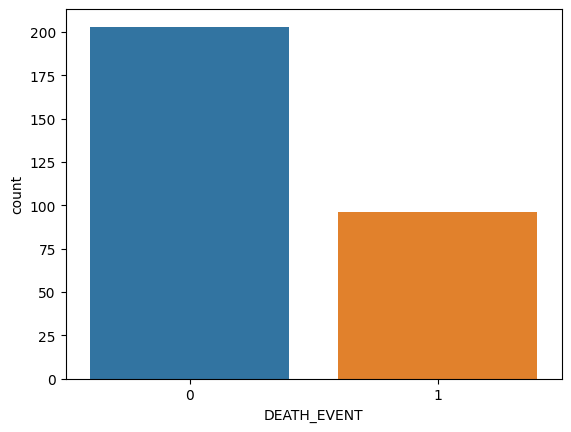

In [6]:
sns.countplot(x='DEATH_EVENT', data=df)

<Axes: xlabel='diabetes', ylabel='count'>

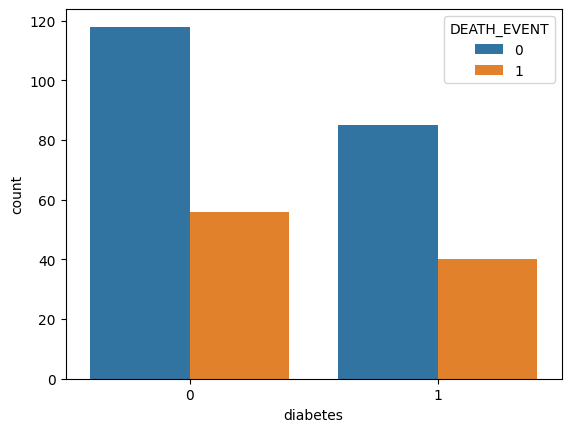

In [7]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

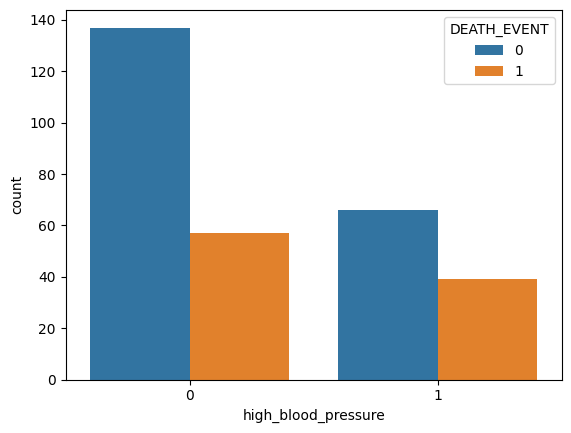

In [8]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

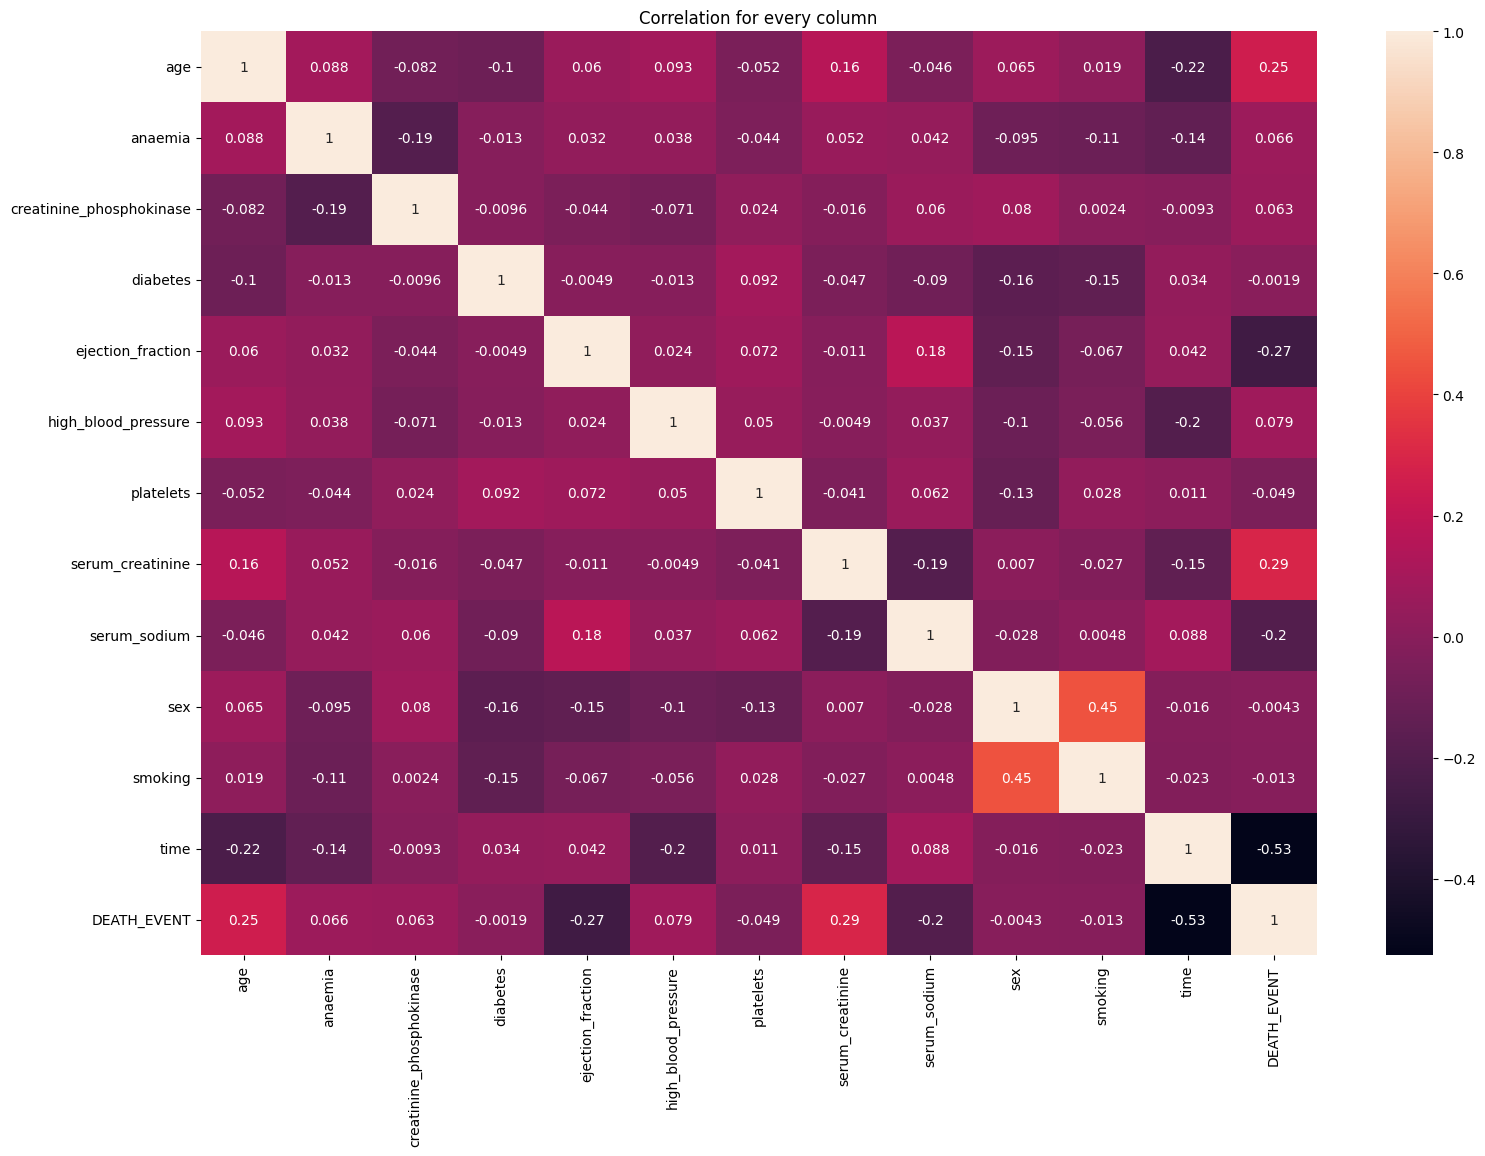

In [10]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(), annot=True)

# Separete x,y

In [11]:
x = df.drop('DEATH_EVENT', axis=1)
y=df[['DEATH_EVENT']]

In [12]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
y.head(15)

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Data Train

In [14]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [15]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [16]:
xtrain.shape

(209, 12)

In [17]:
xtest.shape

(90, 12)

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

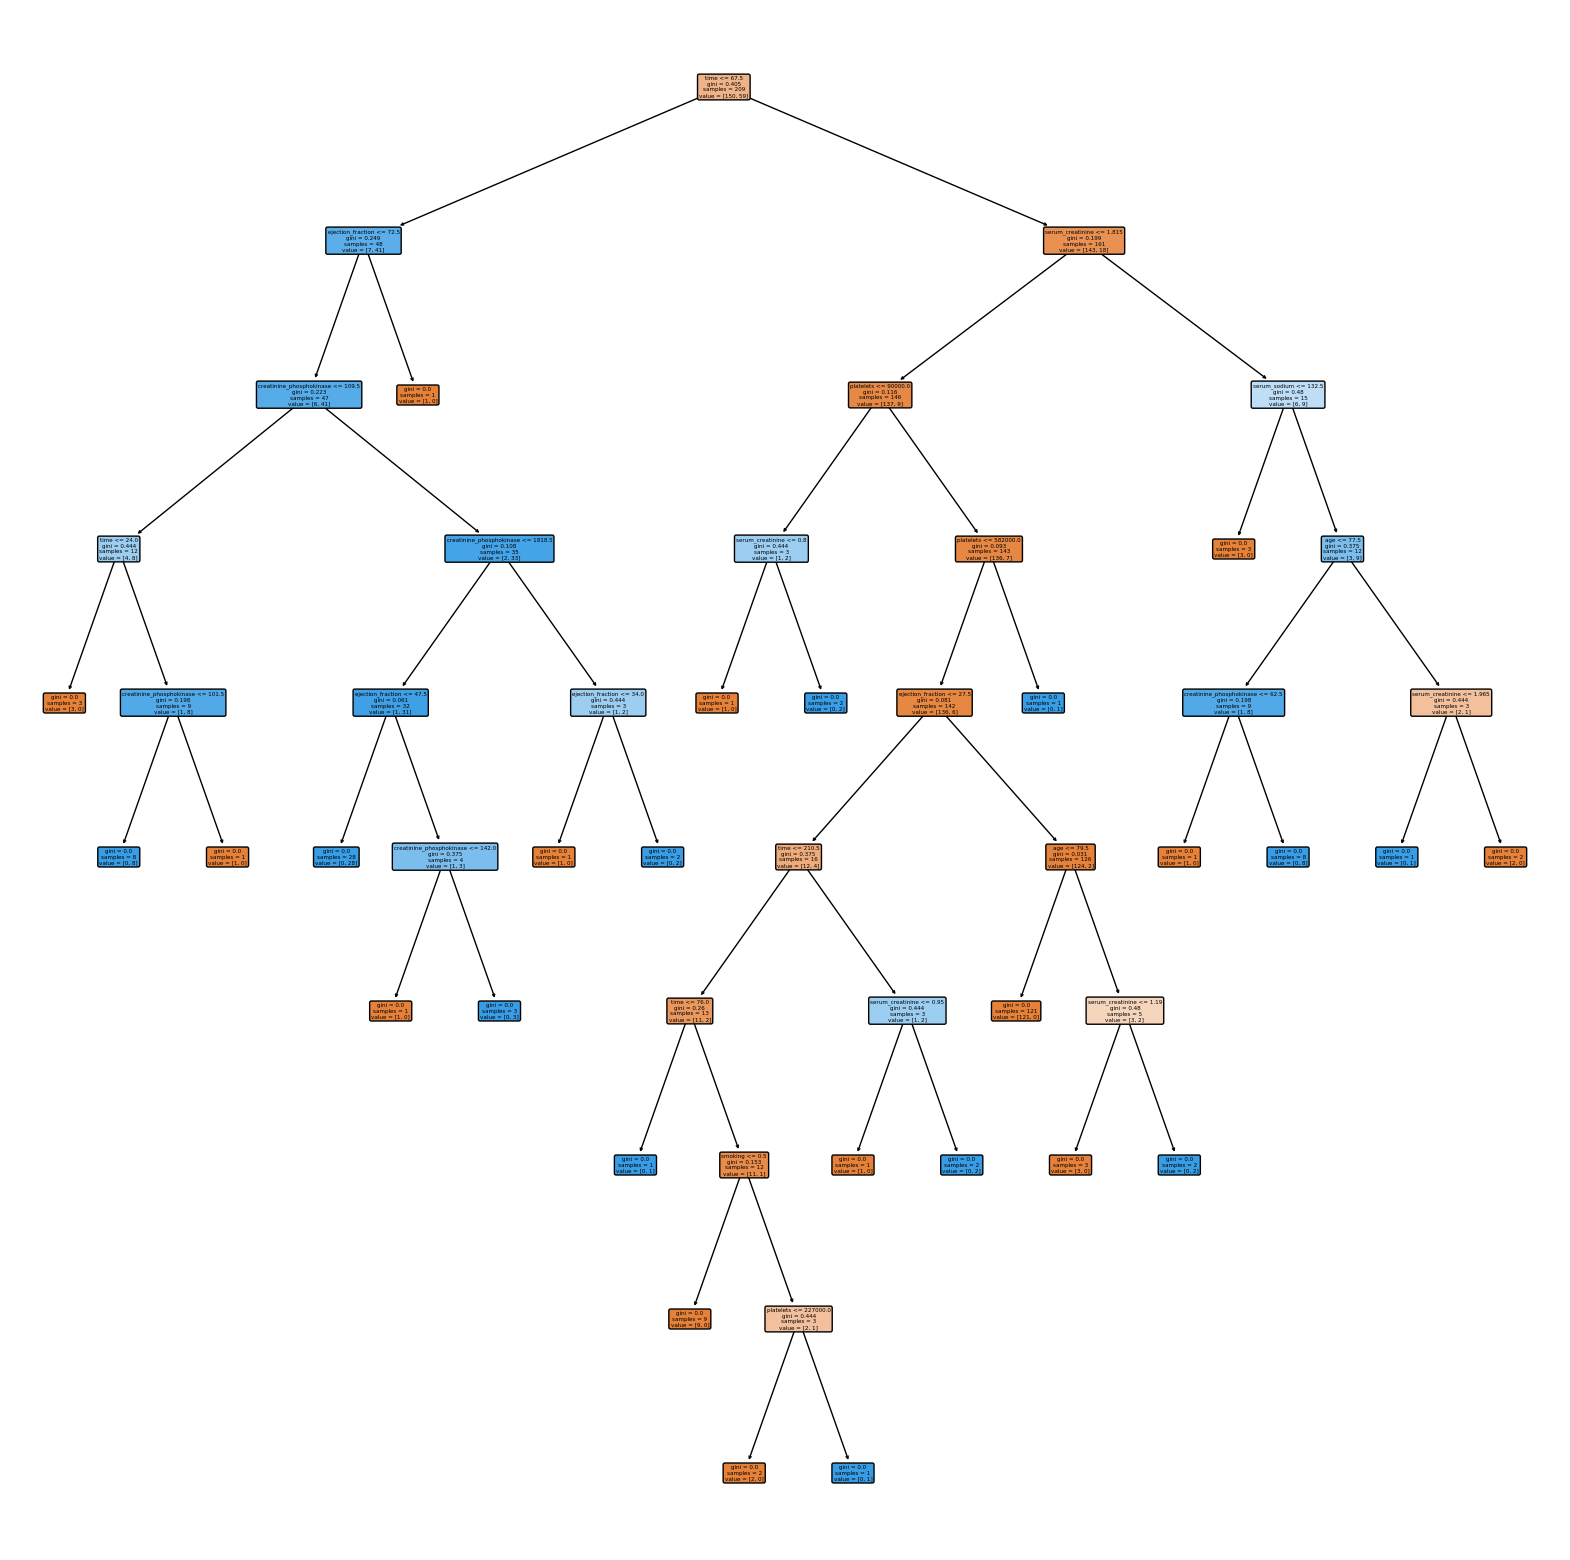

In [20]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [21]:
pred = dt.predict(xtest)

In [22]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [23]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confussion Matrix

In [24]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.77      0.73        53\n           1       0.61      0.51      0.56        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.65        90\nweighted avg       0.66      0.67      0.66        90\n'

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



In [26]:
cm = confusion_matrix(ytest,pred)

In [27]:
cm

array([[41, 12],
       [18, 19]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

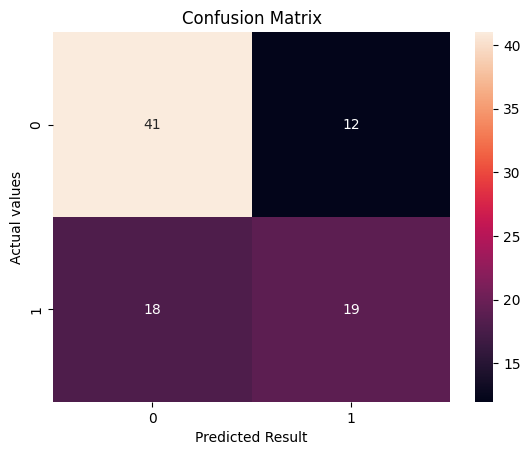

In [28]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')

In [29]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [30]:
tp #True Positive

41

In [31]:
fn #false Negative

12

In [32]:
fp #False positive

18

In [33]:
tn #True Negative

19

In [34]:
accuracy = (tp+tn)/(tp+fp+fn+tn)

In [35]:
accuracy

0.6666666666666666

In [36]:
precision = tp/(tp+fp)

In [37]:
precision #or positive predictive value(ppv)

0.6949152542372882

In [38]:
recall = tp/(tp+fn) #Or sensitivity or hit rate or True positive rate(trp) 

In [39]:
recall

0.7735849056603774

In [40]:
f1_score = 2*(precision*recall)/(precision+recall) #or harmonic mean

In [41]:
f1_score

0.7321428571428573

In [42]:
fpr = fp/(fp+tn) #fpr = False positive rate or 1-specificity

In [43]:
fpr

0.4864864864864865

In [44]:
f1_measure = (precision+recall)/2

In [45]:
f1_measure

0.7342500799488327

In [46]:
specificity = tn/(tn+fp) #or selectivity or True negative rate(tnr)

In [47]:
specificity

0.5135135135135135

In [48]:
csi = tp/(tp+fn+fp) #csi= critical success index or Threar score(ts)

In [49]:
csi

0.5774647887323944

In [50]:
fdr = fp/(tp+fp) #fdr = False Discovery Rate

In [51]:
fdr

0.3050847457627119

In [52]:
!pip  install scikit-plot

In [53]:
!pip install --upgrade scikit-learn

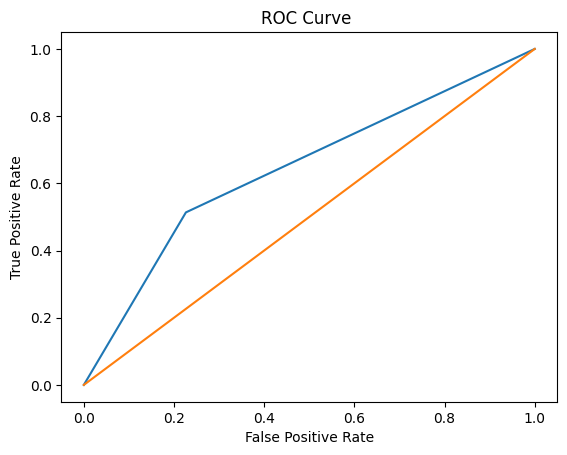

In [71]:
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute the predicted probabilities for the positive class
y_pred_prob = dt.predict_proba(xtest)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.show()

In [62]:
accuracy_score(ytest,pred)

0.6666666666666666

In [64]:
dt.score(xtest,ytest)

0.6666666666666666